# Web Scraping

#### Imports

In [5]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Level 1

### Exercise 1

#### Web scraping of the Madrid stock exchange with BeautifulSoup and Selenium

### BeautifulSoup

Tool for pulling out information from a webpage. Extracting tables, lists, paragraphs from single url. Perfect for small projects.

In [6]:
#scrape html content
url = "https://www.bolsamadrid.es"
page = requests.get(url)

##### Playing around with BeautifulSoup

In [7]:
#parse html code with beautiful soup
soup = BeautifulSoup(page.content, "html.parser")
#print(soup.text)

In [8]:
#find elements by ID
results = soup.find(id="PortBolsa")
#print(soup.prettify)

In [9]:
#find elements by class
column = results.find_all("div", class_="coln1")
for coln1 in column:
    print(coln1, end="\n"*2)

<div class="coln1"><div class="CuadroSlides" style="width:250px;height:180px;"><div class="mclick" data-labelga="imagen Inauguración Foro Latibex 2021 23-11-2021" data-slidetiempo="20000" data-valuega="1"><a href="https://www.bolsasymercados.es/esp/Sala-Comunicacion/Nota-Prensa/20211122/nota_20211122_1/Javier_Hernani_y_Thomas_Zeeb_destacan_el_papel_de_la_Bolsa_como_punto_de_encuentro_con_America_Latina" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6040"/></div></a></div><div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1" style="display:none;"><a href="https://youtu.be/lzIVRMtoJQg" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6019"/></div></a></div><div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;"><a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_d

In [10]:
#pick out child elements
for coln1 in column:
    element1 = coln1.findAll("div", class_="mclick")
    print(element1)

[<div class="mclick" data-labelga="imagen Inauguración Foro Latibex 2021 23-11-2021" data-slidetiempo="20000" data-valuega="1"><a href="https://www.bolsasymercados.es/esp/Sala-Comunicacion/Nota-Prensa/20211122/nota_20211122_1/Javier_Hernani_y_Thomas_Zeeb_destacan_el_papel_de_la_Bolsa_como_punto_de_encuentro_con_America_Latina" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6040"/></div></a></div>, <div class="mclick" data-labelga="vídeo TC Día Edu. Financiera BM 04/10/2021" data-slidetiempo="20000" data-valuega="1" style="display:none;"><a href="https://youtu.be/lzIVRMtoJQg" target="_blank"><div align="center"><img border="0" src="/aspx/Imagen.ashx?num=6019"/></div></a></div>, <div class="mclick" data-labelga="img Pro" data-slidetiempo="15000" data-valuega="1" style="display:none;"><a href="https://www.bolsasymercados.es/esp/Estudios-Publicaciones/Documento/5479_La_inversi%C3%B3n_de_las_familias_en_la_Bolsa_espa%C3%B1ola_sube_hasta_el_17_1__tras_cinco_a%

In [11]:
#find child div element
for x in element1:
    element2 = x.find("div")
print(element2)    

<div style="font-size: 12px; color: #00325D; font-weight: bold; text-align: Left; margin: 0px 0px 7px 0px">Los índices bursátiles como referencia en tiempos de crisis</div>


In [12]:
#print out just text
print(element2.text)

Los índices bursátiles como referencia en tiempos de crisis


In [13]:
#find elements by class name and text content - text crisis
crisis = results.find_all("div", string=lambda text: "crisis")
#how many maching jobs we have?
print(len(crisis))

85


In [14]:
#fetching url elements
urls = []

for w in crisis:
    links = w.find_all("a")
    for link in links:
        urls.append(link.get('href'))
        link_url = link["href"] 
        #print(f"URL: {link_url}\n") 

In [13]:
#print 1 url
urls[:2]

['https://www.bolsasymercados.es/esp/Sala-Comunicacion/Nota-Prensa/20211122/nota_20211122_1/Javier_Hernani_y_Thomas_Zeeb_destacan_el_papel_de_la_Bolsa_como_punto_de_encuentro_con_America_Latina',
 'https://youtu.be/lzIVRMtoJQg']

##### Search for Indices Summary

In [15]:
#search for next url
link = soup.find('a', string='Resumen de Índices')
new_url = link.get('href')
new_url

'/esp/aspx/Indices/Resumen.aspx'

In [16]:
#connect to new url
link = url+new_url
link

'https://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

In [17]:
html_indices = requests.get(link)
soup_indices = BeautifulSoup(html_indices.content, 'html.parser')

In [18]:
table_indices = soup_indices.find("table",class_="TblPort")
table_indices.find_all("th")

[<th scope="col">Nombre</th>,
 <th scope="col">Anterior</th>,
 <th scope="col">Último</th>,
 <th scope="col">% Dif.</th>,
 <th scope="col">Máximo</th>,
 <th scope="col">Mínimo</th>,
 <th scope="col">Fecha</th>,
 <th scope="col">Hora</th>,
 <th class="Ult" scope="col">% Dif.<br/>Año 2021</th>]

In [19]:
columns=[]
for element in table_indices.find_all("th"):
    columns.append(element.get_text())
print(columns)

['Nombre', 'Anterior', 'Último', '% Dif.', 'Máximo', 'Mínimo', 'Fecha', 'Hora', '% Dif.Año 2021']


In [20]:
results=[]
for element in table_indices.find_all("td"):
    results.append(element.get_text())
print(results)

['IBEX 35®', '8.455,20', '8.300,50', '-1,83', '8.383,00', '8.260,70', '30/11/2021', '11:34:24', '2,81', 'IBEX 35® con Dividendos', '26.007,70', '25.531,90', '-1,83', '25.785,50', '25.409,50', '30/11/2021', '11:34:24', '5,23', 'IBEX MEDIUM CAP®', '13.071,80', '12.994,60', '-0,59', '13.054,10', '12.960,60', '30/11/2021', '11:34:20', '2,19', 'IBEX SMALL CAP®', '7.874,30', '7.748,20', '-1,60', '7.839,10', '7.734,60', '30/11/2021', '11:33:56', '-4,32', 'IBEX 35® Bancos', '434,30', '428,30', '-1,38', '430,00', '424,60', '30/11/2021', '11:34:23', '13,88', 'IBEX 35® Energía', '1.291,00', '1.276,20', '-1,15', '1.295,40', '1.265,70', '30/11/2021', '11:34:24', '-1,48', 'IBEX 35® Construcción', '1.471,90', '1.444,90', '-1,83', '1.467,50', '1.440,90', '30/11/2021', '11:34:24', '2,45', 'IBEX TOP Dividendo®', '2.403,00', '2.381,50', '-0,89', '2.395,70', '2.372,60', '30/11/2021', '11:34:24', '9,54', 'IBEX 35® con Dividendos Netos', '21.750,80', '21.352,80', '-1,83', '21.564,90', '21.250,50', '30/11/20

In [20]:
#create dataset with extracted information
data = {}
for i in range(9):
    data[columns[i]]=results[i::9]

df = pd.DataFrame(data)

In [21]:
df

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,"8.402,70","8.455,20","0,62","8.562,00","8.431,70",29/11/2021,17:38:00,"4,73"
1,IBEX 35® con Dividendos,"25.846,10","26.007,70","0,63","26.336,20","25.935,40",29/11/2021,17:38:00,"7,20"
2,IBEX MEDIUM CAP®,"12.992,60","13.071,80","0,61","13.183,00","13.029,90",29/11/2021,17:38:00,"2,80"
3,IBEX SMALL CAP®,"7.862,50","7.874,30","0,15","7.966,40","7.866,60",29/11/2021,17:38:00,"-2,76"
4,IBEX 35® Bancos,"435,20","434,30","-0,21","445,90","433,40",29/11/2021,17:38:00,"15,47"
...,...,...,...,...,...,...,...,...,...
73,Índice ITX Inverso X3,"199,40","190,30","-4,56","196,60","180,90",29/11/2021,17:38:00,"-62,81"
74,Índice TEF Inverso X5,"12.036,30","11.197,90","-6,97","12.098,60","10.759,20",29/11/2021,17:38:00,"440,67"
75,Índice SAN Inverso X5,"5.838,10","5.818,30","-0,34","5.902,20","5.057,80",29/11/2021,17:38:00,"940,42"
76,Índice BBVA Inverso X5,"11.933,10","12.438,90","4,24","12.451,20","10.339,60",29/11/2021,17:38:00,"40,04"


In [22]:
df.to_csv('Indices.csv')

### Selenium

Tool for pulling out information from a webpage. Simulates a real browser and reads also JavaScript. Testing of web applications and midium sized projects.

In [21]:
from selenium.webdriver import Firefox
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By 

#operating in headless mode
opts = Options()
opts.headless = True
browser = Firefox(options=opts)
browser.get('https://www.bolsamadrid.es')

In [22]:
#query the DOM - Document Object Model
#fetching elements in table IBEX35
ibex35 = browser.find_element(By.CLASS_NAME, "TblAccPort")
print(ibex35.text)

Nombre Último % Dif.  
ACCIONA 156,7000 -1,45
ACERINOX 9,8880 -2,34
ACS 21,1500 -1,81
AENA 128,6500 -0,54
ALMIRALL 10,7200 -0,65


In [25]:
#fetching elements in table Daily schedule
schedule = browser.find_element(By.CLASS_NAME, "TblPort")
print(schedule.text)

Evento/Indicador País Periodo Anterior Previsto Actual
Ventas al por menor  Japón Octubre -0,5% (r) 1,1% 0,9%
IPC armonizado provisional  España Noviembre 5,4% 5,6% 5,6%
IPC provisional  España Noviembre 5,4% 4,0% 5,6%
Precios industriales  Italia Octubre 13,3% 20,4%
Confianza del consumidor final  UEM Noviembre -4,8 (r) -6,8 -6,8
IPC provisional  Alemania Noviembre 4,5% 5,0% 5,2%
IPC armonizado provisional  Alemania Noviembre 4,6% 5,5% 6,0%
Ventas pendientes de viviendas  EEUU Octubre -2,4% (r) 0,9% 7,5%


In [26]:
#search for link to dividents
links = browser.find_element(By.LINK_TEXT, "Dividendos")
links.click()

In [27]:
#search for id of table
table = browser.find_element(By.ID, "ctl00_Contenido_tblDatos")

In [28]:
print(table.text)

Fecha
Descuento Fecha
Abono Emisora Valor ISIN Valor Ejercicio Tipo Importe Bruto
21/12/2021 23/12/2021 CLINICA BAVIERA, S.A. CLINICA BAVIERA ES0119037010 A cuenta 2021 Ord. (*)
20/12/2021 22/12/2021 VISCOFAN, S.A. VISCOFAN ES0184262212 A cuenta 2021 Ord. (*)
17/12/2021 21/12/2021 ENAGAS, S.A. ENAGAS ES0130960018 A cuenta 2021 Ord. (*)
17/12/2021 29/12/2021 BRADESPAR,S.A. BRADESPAR ORDINARIAS BRBRAPACNOR5 A cuenta 2021 Ord. (*)
17/12/2021 29/12/2021 BRADESPAR,S.A. BRADESPAR PREFERENTES BRBRAPACNPR2 A cuenta 2021 Ord. (*)
14/12/2021 16/12/2021 ATRESMEDIA CORP. DE MEDIOS DE COM. S.A. ATRESMEDIA CORP. DE MEDIOS DE COM. ES0109427734 A cuenta 2021 Ord. (*)
14/12/2021 16/12/2021 PRIM, S.A. PRIM ES0170884417 A cuenta 2021 Ord. (*)
07/12/2021 10/12/2021 HISPANOTELS INVERSIONES SOCIMI, S.A. HISPANOTELS INVERSIONES ES0105379004 RESERVAS 2021 Ord. (*)
30/11/2021 02/12/2021 ALTIA CONSULTORES, S.A. ALTIA CONSULTORES ES0113312005 A cuenta 2021 Ord. (*)
30/11/2021 02/12/2021 WEALTH RENDITE, SICAV, S.

In [29]:
columns=[]

for element in table.find_elements(By.TAG_NAME, "th"):    
    columns.append(element.text)
    
print(columns)

['Fecha\nDescuento', 'Fecha\nAbono', 'Emisora', 'Valor', 'ISIN Valor', 'Ejercicio', 'Tipo', 'Importe Bruto']


In [30]:
results=[]

for element in table.find_elements(By.TAG_NAME, "td"):    
    results.append(element.text)

print(results)

['21/12/2021', '23/12/2021', 'CLINICA BAVIERA, S.A.', 'CLINICA BAVIERA', 'ES0119037010', 'A cuenta 2021', 'Ord.', '(*)', '20/12/2021', '22/12/2021', 'VISCOFAN, S.A.', 'VISCOFAN', 'ES0184262212', 'A cuenta 2021', 'Ord.', '(*)', '17/12/2021', '21/12/2021', 'ENAGAS, S.A.', 'ENAGAS', 'ES0130960018', 'A cuenta 2021', 'Ord.', '(*)', '17/12/2021', '29/12/2021', 'BRADESPAR,S.A.', 'BRADESPAR ORDINARIAS', 'BRBRAPACNOR5', 'A cuenta 2021', 'Ord.', '(*)', '17/12/2021', '29/12/2021', 'BRADESPAR,S.A.', 'BRADESPAR PREFERENTES', 'BRBRAPACNPR2', 'A cuenta 2021', 'Ord.', '(*)', '14/12/2021', '16/12/2021', 'ATRESMEDIA CORP. DE MEDIOS DE COM. S.A.', 'ATRESMEDIA CORP. DE MEDIOS DE COM.', 'ES0109427734', 'A cuenta 2021', 'Ord.', '(*)', '14/12/2021', '16/12/2021', 'PRIM, S.A.', 'PRIM', 'ES0170884417', 'A cuenta 2021', 'Ord.', '(*)', '07/12/2021', '10/12/2021', 'HISPANOTELS INVERSIONES SOCIMI, S.A.', 'HISPANOTELS INVERSIONES', 'ES0105379004', 'RESERVAS 2021', 'Ord.', '(*)', '30/11/2021', '02/12/2021', 'ALTIA C

In [31]:
data = {}
for i in range(8):
    data[columns[i]]=results[i::8]

df = pd.DataFrame(data)

In [32]:
df

,Fecha\nDescuento,Fecha\nAbono,Emisora,Valor,ISIN Valor,Ejercicio,Tipo,Importe Bruto
0,21/12/2021,23/12/2021,"CLINICA BAVIERA, S.A.",CLINICA BAVIERA,ES0119037010,A cuenta 2021,Ord.,(*)
1,20/12/2021,22/12/2021,"VISCOFAN, S.A.",VISCOFAN,ES0184262212,A cuenta 2021,Ord.,(*)
2,17/12/2021,21/12/2021,"ENAGAS, S.A.",ENAGAS,ES0130960018,A cuenta 2021,Ord.,(*)
3,17/12/2021,29/12/2021,"BRADESPAR,S.A.",BRADESPAR ORDINARIAS,BRBRAPACNOR5,A cuenta 2021,Ord.,(*)
4,17/12/2021,29/12/2021,"BRADESPAR,S.A.",BRADESPAR PREFERENTES,BRBRAPACNPR2,A cuenta 2021,Ord.,(*)
5,14/12/2021,16/12/2021,ATRESMEDIA CORP. DE MEDIOS DE COM. S.A.,ATRESMEDIA CORP. DE MEDIOS DE COM.,ES0109427734,A cuenta 2021,Ord.,(*)
6,14/12/2021,16/12/2021,"PRIM, S.A.",PRIM,ES0170884417,A cuenta 2021,Ord.,(*)
7,07/12/2021,10/12/2021,"HISPANOTELS INVERSIONES SOCIMI, S.A.",HISPANOTELS INVERSIONES,ES0105379004,RESERVAS 2021,Ord.,(*)
8,30/11/2021,02/12/2021,"ALTIA CONSULTORES, S.A.",ALTIA CONSULTORES,ES0113312005,A cuenta 2021,Ord.,(*)
9,30/11/2021,02/12/2021,"WEALTH RENDITE, SICAV, S.A.",WEALTH RENDITE,ES0145837037,RESERVAS 2021,Ord.,(*)


In [33]:
df.to_csv('Dividents.csv')
browser.close()
quit()

## Level 2

### Exercise 2

#### Describe relevant information about the created dataset

### Dataset Indices Summary from Madrid Stock Exchange

#### Context

The dataset consists of set of price data for indices tracking stock exchanges from Spain. The data was all collected from Madrid Stock Exchange website 17.11.2021 at 9:50AM.

Prices are quoted in euros.

This dataset was created is a result of webscraping test and is designed to be a playground for pre-processing and technical analysis.

#### Content

Indices.csv: prices for indices tracking stock exchanges

The categories of this dataset: 
- Nombre - Name of inex
- Anterior - Previous price
- Último - Previous price
- % Dif. - Difference of prices in %
- Máximo - High
- Mínimo - Low
- Fecha - Date
- Hora - Hour
- % Dif.Año 2021 - Difference of prices for 2021 in %

#### Acknowledgements

- Source: https://www.bolsamadrid.es
- Github: https://github.com/dominikapetru/web_scraping

In [2]:
df = pd.read_csv('Indices.csv')
df.head(5)

,Unnamed: 0,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,0,IBEX 35®,"8.402,70","8.455,20","0,62","8.562,00","8.431,70",29/11/2021,17:38:00,"4,73"
1,1,IBEX 35® con Dividendos,"25.846,10","26.007,70","0,63","26.336,20","25.935,40",29/11/2021,17:38:00,"7,20"
2,2,IBEX MEDIUM CAP®,"12.992,60","13.071,80","0,61","13.183,00","13.029,90",29/11/2021,17:38:00,"2,80"
3,3,IBEX SMALL CAP®,"7.862,50","7.874,30","0,15","7.966,40","7.866,60",29/11/2021,17:38:00,"-2,76"
4,4,IBEX 35® Bancos,"435,20","434,30","-0,21","445,90","433,40",29/11/2021,17:38:00,"15,47"


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nombre          78 non-null     object
 1   Anterior        78 non-null     object
 2   Último          78 non-null     object
 3   % Dif.          78 non-null     object
 4   Máximo          78 non-null     object
 5   Mínimo          78 non-null     object
 6   Fecha           78 non-null     object
 7   Hora            78 non-null     object
 8   % Dif.Año 2021  78 non-null     object
dtypes: object(9)
memory usage: 5.6+ KB


In [5]:
df['Anterior'] = df['Anterior'].str.replace('.','').str.replace(',','.').astype(float)
df['Último'] = df['Último'].str.replace('.','').str.replace(',','.').astype(float)
df['% Dif.'] = df['% Dif.'].str.replace(',','.')
df['Máximo'] = df['Máximo'].str.replace('.','').str.replace(',','.').astype(float)
df['Mínimo'] = df['Mínimo'].str.replace('.','').str.replace(',','.').astype(float)
df['% Dif.Año 2021'] = df['% Dif.Año 2021'].str.replace(',','.')

df.head(5)

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,8402.7,8455.2,0.62,8562.0,8431.7,29/11/2021,17:38:00,4.73
1,IBEX 35® con Dividendos,25846.1,26007.7,0.63,26336.2,25935.4,29/11/2021,17:38:00,7.20
2,IBEX MEDIUM CAP®,12992.6,13071.8,0.61,13183.0,13029.9,29/11/2021,17:38:00,2.80
3,IBEX SMALL CAP®,7862.5,7874.3,0.15,7966.4,7866.6,29/11/2021,17:38:00,-2.76
4,IBEX 35® Bancos,435.2,434.3,-0.21,445.9,433.4,29/11/2021,17:38:00,15.47


In [6]:
list = len(df)
list

78

In [7]:
#negative values - conversion to float
for i in range (list):
    df['% Dif.'] = df.at[i,'% Dif.'].replace('\U00002013', '-')
    df['% Dif.Año 2021'] = df.at[i,'% Dif.Año 2021'].replace('\U00002013', '-')

In [8]:
df['% Dif.'].astype(float)
df['% Dif.Año 2021'].astype(float)

#clean dataset
df.head(5)

,Nombre,Anterior,Último,% Dif.,Máximo,Mínimo,Fecha,Hora,% Dif.Año 2021
0,IBEX 35®,8402.7,8455.2,0.62,8562.0,8431.7,29/11/2021,17:38:00,4.73
1,IBEX 35® con Dividendos,25846.1,26007.7,0.62,26336.2,25935.4,29/11/2021,17:38:00,4.73
2,IBEX MEDIUM CAP®,12992.6,13071.8,0.62,13183.0,13029.9,29/11/2021,17:38:00,4.73
3,IBEX SMALL CAP®,7862.5,7874.3,0.62,7966.4,7866.6,29/11/2021,17:38:00,4.73
4,IBEX 35® Bancos,435.2,434.3,0.62,445.9,433.4,29/11/2021,17:38:00,4.73


Clean dataset ready for data analysis.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          78 non-null     object 
 1   Anterior        78 non-null     float64
 2   Último          78 non-null     float64
 3   % Dif.          78 non-null     object 
 4   Máximo          78 non-null     float64
 5   Mínimo          78 non-null     float64
 6   Fecha           78 non-null     object 
 7   Hora            78 non-null     object 
 8   % Dif.Año 2021  78 non-null     object 
dtypes: float64(4), object(5)
memory usage: 5.6+ KB


## Level 3

### Exercise 3

#### Web scraping of any webpage with Scrapy

In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess
import emoji

In [3]:
#new spider class
class MySpider(scrapy.Spider):
    name = "spider"
    
    #define the urls for crawling
    def start_requests(self):
        urls = ['https://www.habitaclia.com/viviendas-en-girones.htm',
                'https://www.habitaclia.com/viviendas-en-girones-1.htm',
                'https://www.habitaclia.com/viviendas-en-girones-2.htm']
        for url in urls:
            yield scrapy.Request(url=url, callback=self.parse)
    
    #parsing the main div section with articles       
    def parse(self, response):
        articles1 = response.xpath('//div[@class="list-item-info"]')
        
        #extrecting values
        for element in articles1:
            title = element.xpath('.//h3/a/@title').extract_first()
            neighborhood = element.xpath('.//p/span/text()').extract_first()
            price = element.xpath('.//span[@class="font-2"]/text()').extract_first()
            url = element.xpath('.//h3/a/@href').extract_first()
            description = element.xpath('.//p[@class="list-item-description"]/text()').extract_first()  

            #hold data for later saving          
            yield {
                'title': title,
                'neighborhood': neighborhood,
                'price': price,
                'url': url,
                'description': description,
            }

#extract data to csv, also possible to use json 
FILE_NAME = 'data.csv'
SETTINGS = {
            'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
            'FEED_FORMAT': 'csv',
            'FEED_URI': FILE_NAME,
            'DOWNLOAD_DELAY': 1,
            } 

In [4]:
#starting the spider
process = CrawlerProcess(SETTINGS)
process.crawl(MySpider) 
process.start()

2021-11-29 19:29:56 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2021-11-29 19:29:56 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.7.0, Python 3.8.8 (default, Apr 13 2021, 12:59:45) - [Clang 10.0.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 3.4.7, Platform macOS-10.14.6-x86_64-i386-64bit
2021-11-29 19:29:56 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-11-29 19:29:56 [scrapy.crawler] INFO: Overridden settings:
{'DOWNLOAD_DELAY': 1,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2021-11-29 19:29:56 [scrapy.extensions.telnet] INFO: Telnet Password: d3072257a4c564b7
2021-11-29 19:29:56 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.

In [5]:
print(emoji.emojize('Hacking!!! :thumbs_up:'))

Hacking!!! 👍


In [23]:
import pandas as pd

df=pd.read_csv('data.csv')
df

,title,neighborhood,price,url,description
0,Piso Ford roig-montjuic. Piso con 3 habitacio...,Girona - Montjuïc,325.000 €,https://www.habitaclia.com/comprar-piso-con_3_...,Fantástico piso esquinero de 3 habitaciones y ...
1,Piso Emili grahit. Piso con 6 habitaciones co...,Girona - Eixample Nord,450.000 €,https://www.habitaclia.com/comprar-piso-con_6_...,Piso de 205m2 con Gran Potencial en medio del ...
2,Ático en Eixample Nord. Atico duplex exclusi...,Girona - Eixample Nord,999.000 €,https://www.habitaclia.com/comprar-atico-duple...,Atico dúplex exclusivo en el corazón de Girona...
3,Piso Jaume i. Piso con 5 habitaciones con asc...,Girona - Eixample Nord,395.000 €,https://www.habitaclia.com/comprar-piso-con_5_...,PISO DE GRANDES POSIBILIDADES EN EL CORAZÓN D...
4,Casa adosada en Palau. Oportunitat casa a pa...,Girona - Palau,525.000 €,https://www.habitaclia.com/comprar-casa_adosad...,Fantàstica casa a la zona de Palau de Girona. ...
...,...,...,...,...,...
75,Piso en Calle roger de llúria 8. Disfruta de...,Vilablareix,260.000 €,https://www.habitaclia.com/comprar-piso-disfru...,Buscas un piso con terraza? ¿Quieres vivir en ...
76,Casa en Bordils. Casa con 13 habitaciones co...,Bordils,1.195.000 €,https://www.habitaclia.com/comprar-casa-con_13...,Bienvenidos a esta maravillosa masía situada e...
77,Chalet en Llagostera,Llagostera,365.000 €,https://www.habitaclia.com/comprar-chalet-en-l...,Fantástica casa independiente de 366 m2 en una...
78,Piso Carrer de santa eugènia. Piso en santa e...,Girona - Santa Eugenia,95.000 €,https://www.habitaclia.com/comprar-piso-en_san...,"PISO EN SANTA EUGENIA ZONA MARISTES, dispone d..."


#### Girona properties for sale dataset
This dataset contains first 5 pages of Habitaclia posts about properties for sale in Girona city. It could be used for monitoring prices in specific neighborhood or analyzing average prices while thinking about selling or buying. Moreover, it might serve for answering these questions:
- Which is the neighborhood with highest offer of housing?
- Which is the most expensive neighborhood?
- What's the average size of housing on the market?

In [24]:
list = df['neighborhood'].unique()
list

array(['Girona - Montjuïc', 'Girona - Eixample Nord', 'Girona - Palau',
       'Girona - Eixample Sud-Migdia', 'Girona - Centre-Barri Vell',
       'Girona - Centre-Carme', 'Girona - La Devesa',
       'Girona - Fontajau-Domeny', 'Vilablareix',
       'Girona - Santa Eugenia', 'Quart', 'Cassà de la Selva',
       'Fornells de la Selva', 'Girona - Montilivi', 'Salt - Veïnat',
       'Llagostera', 'Sant Gregori', 'Campllong', 'Salt - Centre',
       'Bordils', 'Girona - Sant Narcis'], dtype=object)

In [25]:
df_Eixample = df.loc[df['neighborhood'] == 'Girona - Eixample Sud-Migdia']
df_Montilivi = df.loc[df['neighborhood'] == 'Girona - Montilivi']
print(df_Eixample['title'].count(), df_Montilivi['title'].count())

6 5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         80 non-null     object
 1   neighborhood  80 non-null     object
 2   price         79 non-null     object
 3   url           80 non-null     object
 4   description   80 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [27]:
df['price'] = df['price'].str.replace('.','').str.replace(' €','').astype(float)
df.head()

,title,neighborhood,price,url,description
0,Piso Ford roig-montjuic. Piso con 3 habitacio...,Girona - Montjuïc,325000.0,https://www.habitaclia.com/comprar-piso-con_3_...,Fantástico piso esquinero de 3 habitaciones y ...
1,Piso Emili grahit. Piso con 6 habitaciones co...,Girona - Eixample Nord,450000.0,https://www.habitaclia.com/comprar-piso-con_6_...,Piso de 205m2 con Gran Potencial en medio del ...
2,Ático en Eixample Nord. Atico duplex exclusi...,Girona - Eixample Nord,999000.0,https://www.habitaclia.com/comprar-atico-duple...,Atico dúplex exclusivo en el corazón de Girona...
3,Piso Jaume i. Piso con 5 habitaciones con asc...,Girona - Eixample Nord,395000.0,https://www.habitaclia.com/comprar-piso-con_5_...,PISO DE GRANDES POSIBILIDADES EN EL CORAZÓN D...
4,Casa adosada en Palau. Oportunitat casa a pa...,Girona - Palau,525000.0,https://www.habitaclia.com/comprar-casa_adosad...,Fantàstica casa a la zona de Palau de Girona. ...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         80 non-null     object 
 1   neighborhood  80 non-null     object 
 2   price         79 non-null     float64
 3   url           80 non-null     object 
 4   description   80 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


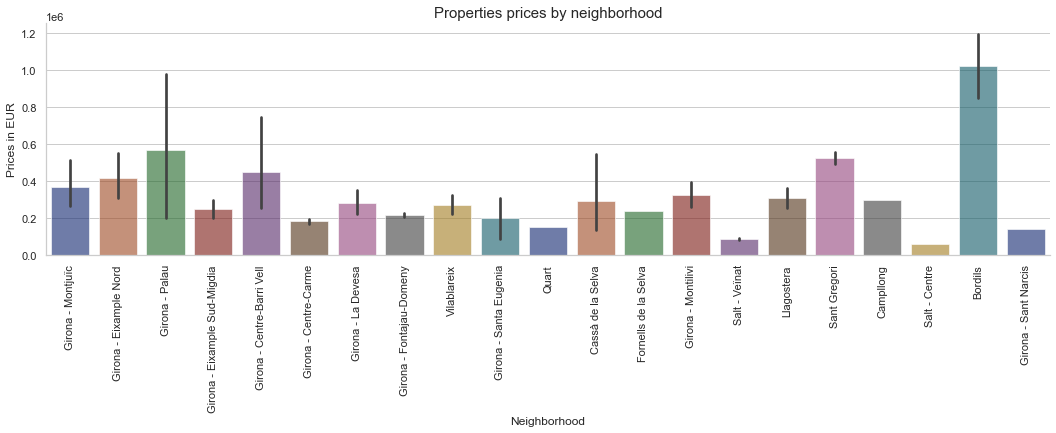

In [29]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, kind="bar",x="neighborhood", y="price",palette="dark", alpha=.6, height=4, aspect=15/4)
plt.xlabel("Neighborhood",fontsize=12)
plt.ylabel("Prices in EUR",fontsize=12)
plt.title("Properties prices by neighborhood",fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Notes
* Beautiful Soup
    - https://realpython.com/beautiful-soup-web-scraper-python/
* Selenium
    - https://realpython.com/modern-web-automation-with-python-and-selenium/
    - https://www.selenium.dev/documentation/es/getting_started/
    - https://scrapy.org
    - https://selenium-python.readthedocs.io/getting-started.html#simple-usage
* Avoid getting blocked
    - https://www.codementor.io/@scrapingdog/10-tips-to-avoid-getting-blocked-while-scraping-websites-16papipe62
* Comparision Beautiful Soup, Selenium, Scrapy  
    - https://medium.com/analytics-vidhya/scrapy-vs-selenium-vs-beautiful-soup-for-web-scraping-24008b6c87b8
* Scrapy
    - step by step https://letslearnabout.net/tutorial/scrapy-tutorial/python-scrapy-tutorial-for-beginners-01-creating-your-first-spider/
    - how to export https://stackoverflow.com/questions/47417332/scrapy-crawlerprocess-not-saving-data-with-crawlspider
    - tutorial https://www.tutorialspoint.com/scrapy/scrapy_overview.htm
    - selectors https://docs.scrapy.org/en/latest/topics/selectors.html
    - tutorial with books https://medium.com/quick-code/python-scrapy-tutorial-for-beginners-02-extract-all-the-data-aa0165501b4c
    - https://towardsdatascience.com/run-scrapy-code-from-jupyter-notebook-without-issues-69b7cb79530c
    - https://www.jitsejan.com/using-scrapy-in-jupyter-notebook
    - https://books.toscrape.com/
* Tutorial 
    - https://www.youtube.com/watch?v=Xjv1sY630Uc